# Credit Risk Modeling 
- **Author:** Wiseman Radebe
- **Date:** 15/05/25
- **Objective:** 

---

## Table of Contents
1. [Environment Setup]
2. [Importing Dataset]
3. [Lookthrough Dataset]
4. [Data Exploration]
5. [Correlation]
6. [Summary]

---

# 1. Environment Setup
Setting up the required libraries and configurations for data collection.

In [103]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("Environment setup complete!")
print(f"pandas version: {pd.__version__}")
print(f"Current date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Environment setup complete!
pandas version: 2.3.1
Current date: 2025-09-05 14:41:53


# 2. Importing Dataset
Importing datataset from kaggle using their API

In [104]:
import kagglehub
file_path = r"C:\Users\wisem\.cache\kagglehub\datasets\kabure\german-credit-data-with-risk\versions\1\german_credit_data.csv"
german_data = pd.read_csv(file_path)

print((german_data).head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  


# 3. Dataset Lookthrough


In [105]:
# Checking for any missing values, data type and the shape
print(german_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


In [106]:
print(german_data.isnull().sum())

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


# 4. Data Exploration
Performing comprehensive data validation and quality assessment.

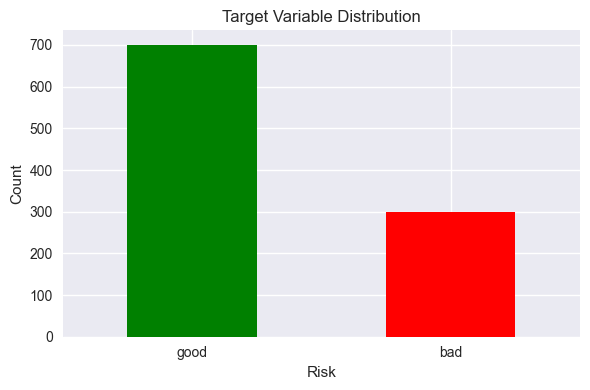

In [ ]:


# Count of "good" vs "bad" risks
risk_counts = german_data["Risk"].value_counts()

# Simple bar chart
plt.figure(figsize=(6,4))
risk_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Target Variable Distribution")
plt.xlabel("Risk")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



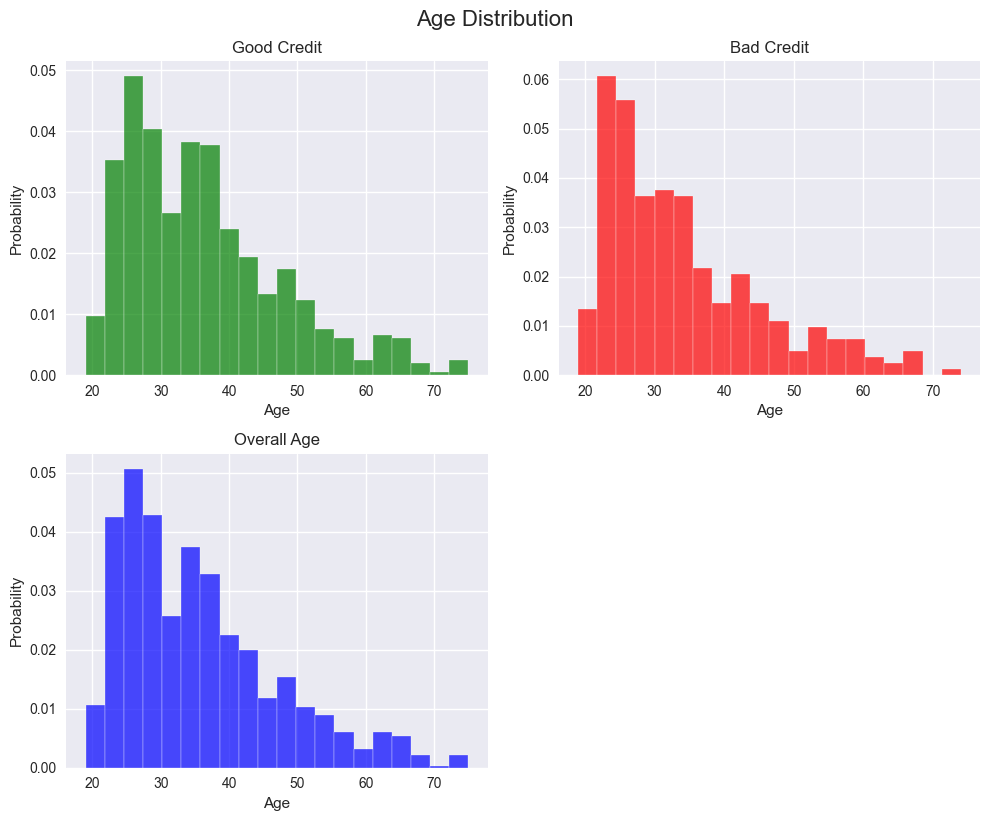

In [107]:
# Extract data
df_good = german_data.loc[german_data["Risk"] == 'good']['Age']
df_bad = german_data.loc[german_data["Risk"] == 'bad']['Age']
df_age = german_data['Age']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10,8))
fig.delaxes(axes[1,1])  # Remove unused subplot

# First plot: Good Credit
axes[0,0].hist(df_good, bins=20, density=True, color='green', alpha=0.7)
axes[0,0].set_title('Good Credit')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Probability')

# Second plot: Bad Credit
axes[0,1].hist(df_bad, bins=20, density=True, color='red', alpha=0.7)
axes[0,1].set_title('Bad Credit')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Probability')

# Third plot: Overall Age
axes[1,0].hist(df_age, bins=20, density=True, color='blue', alpha=0.7)
axes[1,0].set_title('Overall Age')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Probability')

plt.tight_layout()
plt.suptitle("Age Distribution", y=1.02, fontsize=16)
plt.show()


### Age Distribution

- The age distribution of individuals with good credit is concentrated mostly between ages 25 and 40, with a peak around the late 20s to early 30s, and it tapers off towards older ages.
- Those with bad credit also show a concentration of ages between 25 and 35, but with a slightly higher probability density among younger individuals (mid-20s) and a quicker decline after age 40.
- There is a noticeable difference in the height and shape of the distribution curves: bad credit is relatively more prevalent in the younger age bands compared to good credit.

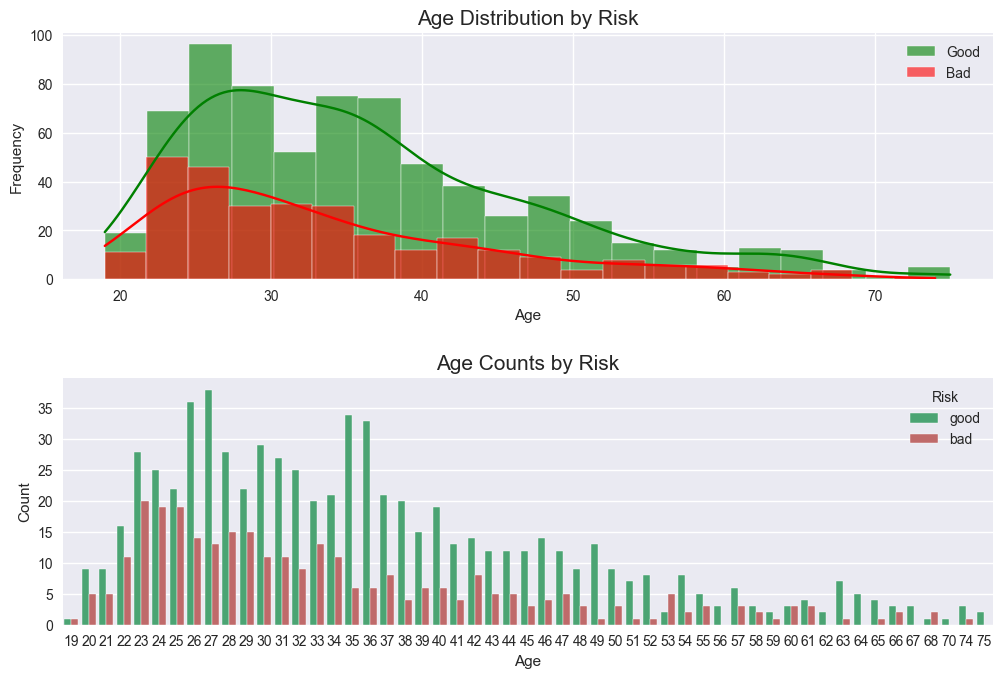

In [108]:

df_good = german_data[german_data["Risk"] == 'good']
df_bad = german_data[german_data["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.85)

# Histogram for Good vs Bad Age
sns.histplot(df_good["Age"], bins=20, color="g", alpha=0.6, ax=ax[0], label="Good",kde=True)
sns.histplot(df_bad["Age"], bins=20, color="r", alpha=0.6, ax=ax[0], label="Bad",kde=True)
ax[0].set_title("Age Distribution by Risk", fontsize=15)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Frequency")
ax[0].legend()

# Countplot for Age by Risk
sns.countplot(x="Age", data=german_data, palette=["mediumseagreen","indianred"], ax=ax[1], hue="Risk")
ax[1].set_title("Age Counts by Risk", fontsize=15)
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Count")

plt.show()


### Age Distribution by Risk

- The majority of individuals, both with good and bad credit, fall within the age range of 25 to 40, with good credit being much more prevalent across all ages.
- Good credit occurrences peak between ages 27 and 35, as shown by both the histogram and the smooth density curve, while bad credit is more common in the mid-20s and declines more rapidly with age.
- The count of people with good credit consistently exceeds those with bad credit for every age group, particularly in the 25 to 40 range.

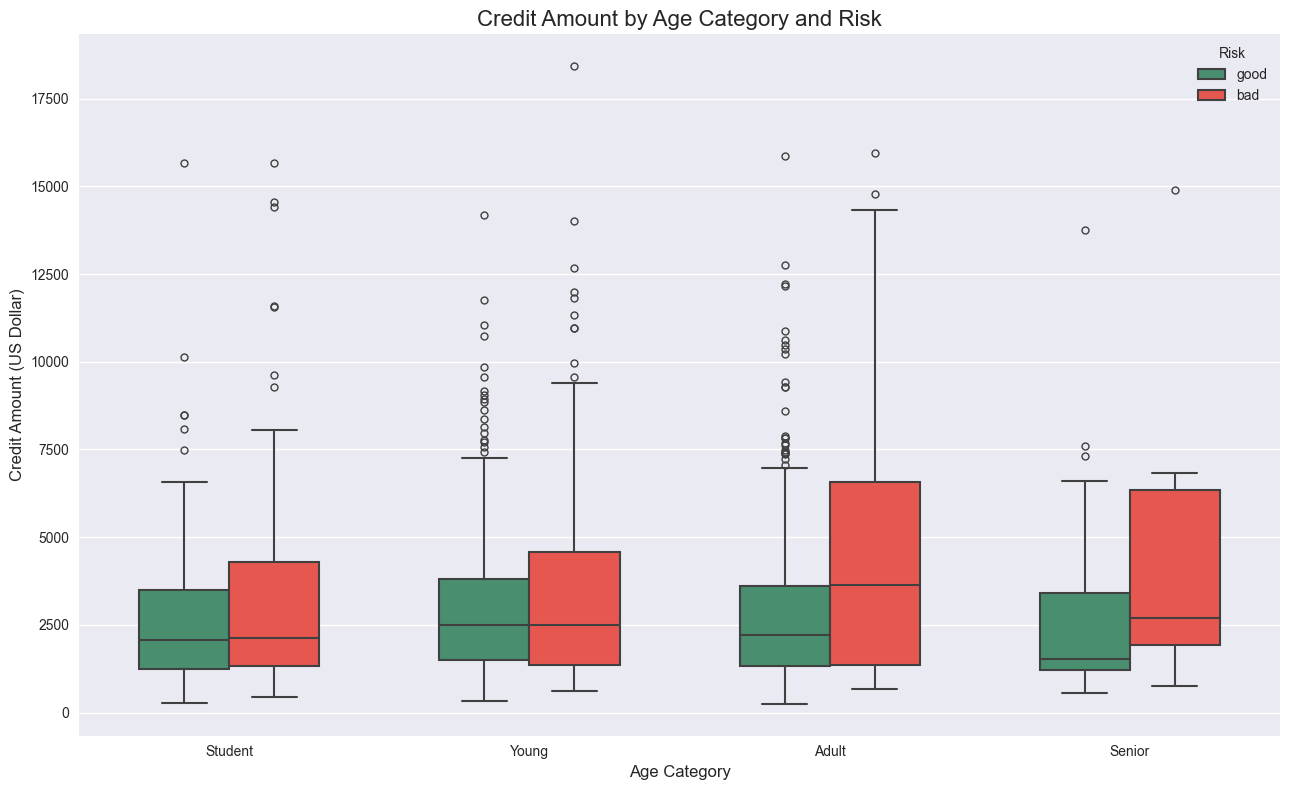

In [8]:
#Grouping the ages into categories
interval = (18, 25, 35, 60, 100)

cats = ['Student', 'Young', 'Adult', 'Senior']
german_data["Age_cat"] = pd.cut(german_data.Age, interval, labels=cats)


df_good = german_data[german_data["Risk"] == 'good']
df_bad = german_data[german_data["Risk"] == 'bad']

df_combined=pd.concat([df_good,df_bad])

# Set color palette
palette = {'good': '#3D9970',  # mid green
           'bad': '#FF4136'}   # light red

# Create the grouped box plot
plt.figure(figsize=(13,8))
sns.boxplot(
    x='Age_cat',
    y='Credit amount',
    hue='Risk',
    data=df_combined,
    palette=palette,
    width=0.6,
    fliersize=5,
    linewidth=1.5
)

# Titles and labels
plt.title('Credit Amount by Age Category and Risk', fontsize=16)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Credit Amount (US Dollar)', fontsize=12)
plt.legend(title='Risk')
plt.tight_layout()
plt.show()




### Credit Amount by Age Category and Risk

- Across all age categories (Student, Young, Adult, Senior), individuals classified as bad credit risk generally have a higher median and a higher upper-range credit amounts compared to those with good credit risk.
- The spread (interquartile range) and incidence of high outliers are notably greater among the bad credit risk group, particularly for Adults, indicating both higher and more variable credit exposure.
- In every age category, good credit risk individuals display lower median credit amounts and fewer extreme values, reflecting more conservative or managed credit usage.
- For Seniors and Students, the differences between good and bad credit risk are less pronounced, but bad risk outliers with very high credit amounts are still evident.
- The data highlights a general trend: higher credit amounts and greater variability are consistently associated with elevated credit risk status across age groups.

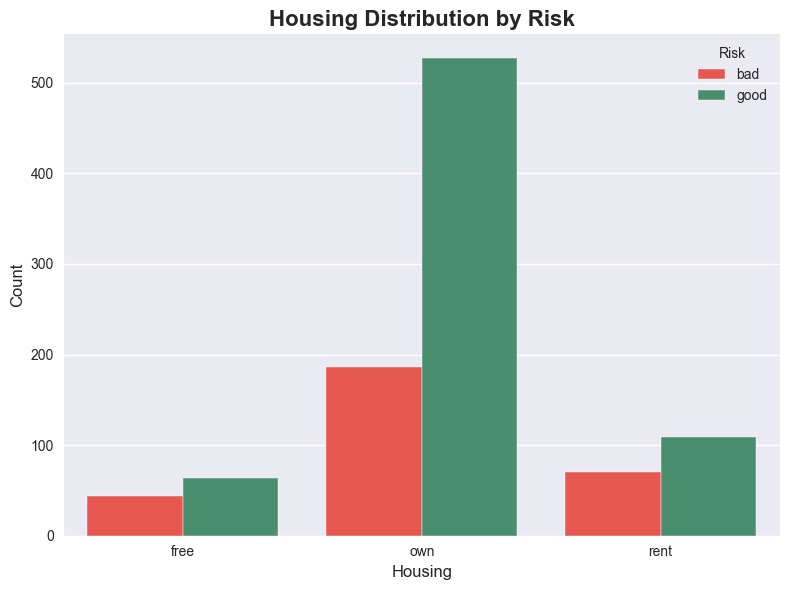

In [110]:
# Count data for plotting
df_counts = german_data.groupby(['Housing', 'Risk']).size().reset_index(name='Count')

# Set color palette
palette = {'good': '#3D9970', 'bad': '#FF4136'}

# Create grouped bar plot
plt.figure(figsize=(8,6))
sns.barplot(
    x='Housing',
    y='Count',
    hue='Risk',
    data=df_counts,
    palette=palette
)

# Titles and labels
plt.title('Housing Distribution by Risk', fontsize=16, weight='bold')
plt.xlabel('Housing', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Risk')
plt.tight_layout()
plt.show()




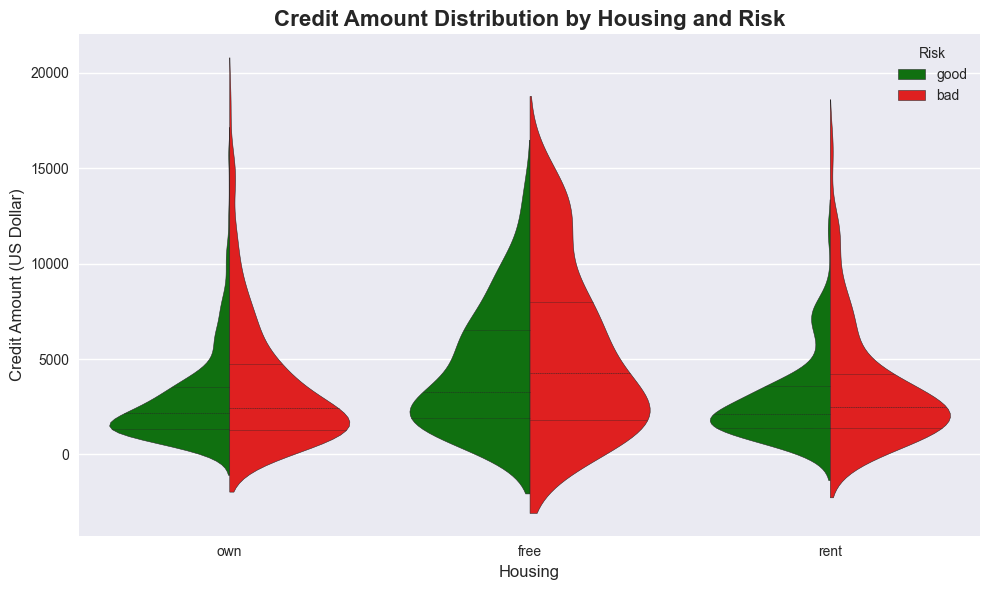

In [10]:
# Combine Good and Bad data with a 'Risk' column
df_good['Risk'] = 'good'
df_bad['Risk'] = 'bad'
df_combined = pd.concat([df_good, df_bad])

# Set color palette
palette = {'good': 'green', 'bad': 'red'}

# Create the violin plot
plt.figure(figsize=(10,6))
sns.violinplot(
    x='Housing',
    y='Credit amount',
    hue='Risk',
    data=df_combined,
    palette=palette,
    split=True,       # Split violins to show both groups
    inner='quartile',      # Shows quartiles inside violin
    scale='width'     # Makes all violins the same width
)

# Add titles and labels
plt.title('Credit Amount Distribution by Housing and Risk', fontsize=16, weight='bold')
plt.xlabel('Housing', fontsize=12)
plt.ylabel('Credit Amount (US Dollar)', fontsize=12)
plt.legend(title='Risk')
plt.tight_layout()
plt.show()

### Credit Amoubt Distribution by Housing and Risk

- For all housing categories, bad credit risks (red) tend to have higher variability in credit amounts compared to good credit risks (green).
- Individuals with free housing show the widest spread of credit amounts, especially among bad risks, suggesting less predictability in repayment capacity.
- Those with own housing generally have lower median credit amounts than those with free housing, but the bad risk group still shows extreme high values.
- Renters tend to take out smaller credit amounts compared to those who own or have free housing.
- The overlap between good and bad risks indicates that housing status alone is not a strong differentiator, but it provides useful insights when combined with other features in risk modeling.
- Outliers (very high credit amounts) are more frequent among the bad risk group across all housing categories.

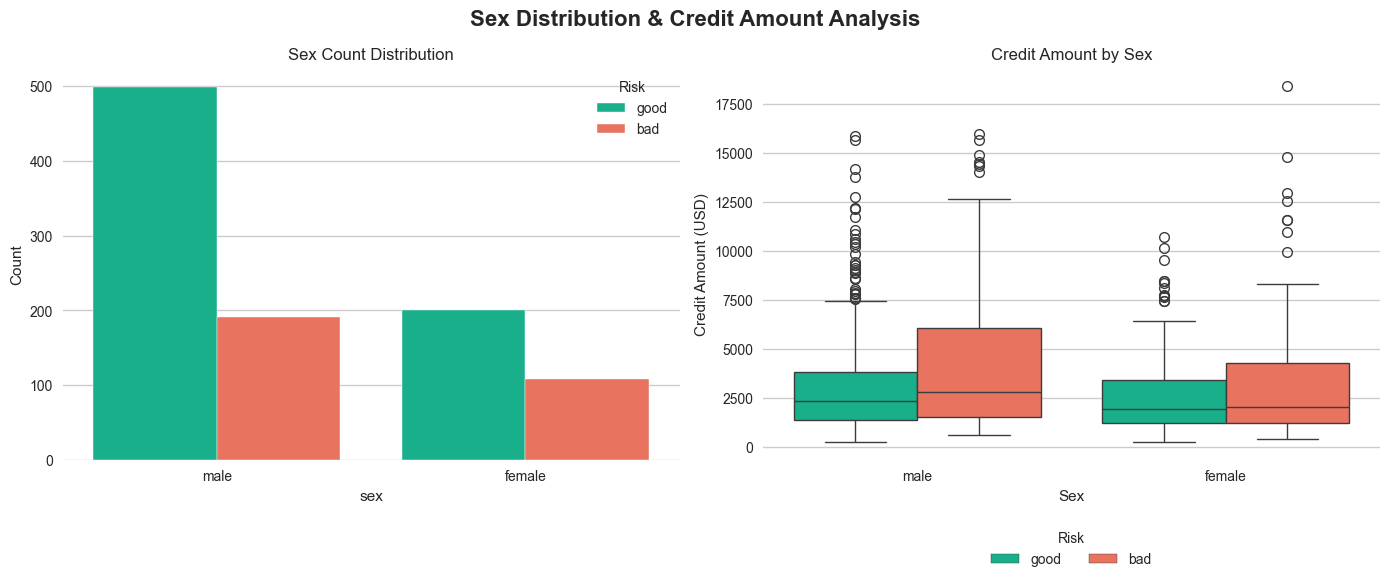

In [11]:
# Set a professional theme
sns.set_style("whitegrid")
sns.set_palette(["#00C896", "#FF6347"])  # teal for good, tomato red for bad

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- First subplot: Count plot ---
sns.countplot(
    data=german_data,
    x="Sex",
    hue="Risk",
    ax=axes[0]
)
axes[0].set_title("Sex Count Distribution")
axes[0].set_xlabel("sex")
axes[0].set_ylabel("Count")

# --- Second subplot: Box plot ---
sns.boxplot(
    data=german_data,
    x="Sex",
    y="Credit amount",
    hue="Risk",
    ax=axes[1]
)
axes[1].set_title("Credit Amount by Sex")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Credit Amount (USD)")

# Improve layout
axes[1].legend_.remove()  # remove duplicate legend
plt.legend(title="Risk", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.suptitle("Sex Distribution & Credit Amount Analysis", fontsize=16, weight="bold")

plt.tight_layout()
plt.show()


### Credit Amount by Sex 

- Both males and females in the bad risk category tend to have higher credit amounts compared to those in the good risk category.
- The median credit amount is consistently higher for bad risks across both genders.
- Male applicants show greater variability in credit amounts, with more extreme high-value outliers than females.
- Female applicants have fewer extreme outliers, but still show noticeable differences between good and bad risk groups.
- This indicates that higher credit amounts may be associated with increased credit risk, regardless of gender.

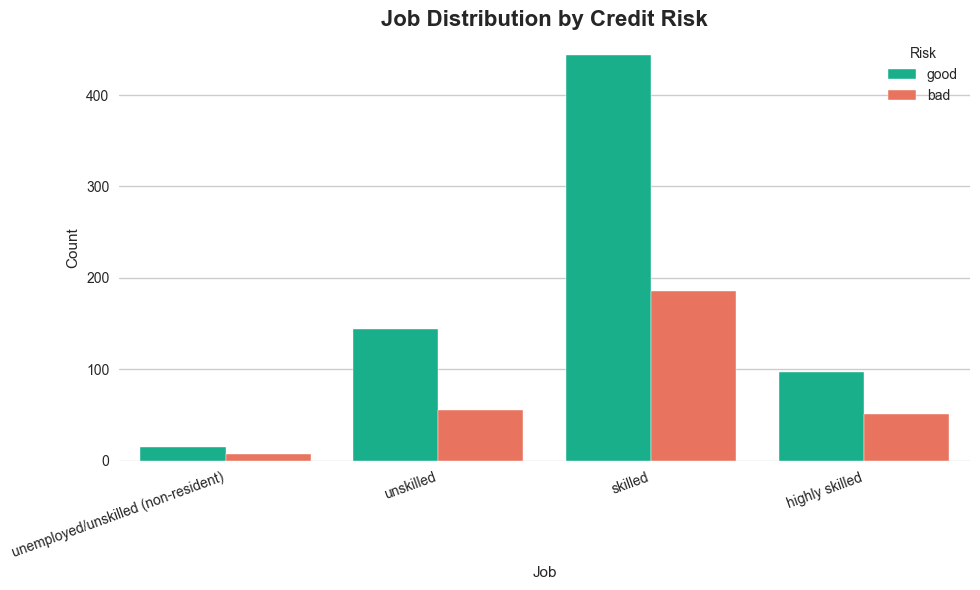

In [112]:
# Full mapping of Job codes
job_mapping = {
    0: "unemployed/unskilled (non-resident)",
    1: "unskilled",
    2: "skilled",
    3: "highly skilled"
}

# Apply mapping
german_data["Job"] = german_data["Job"].replace(job_mapping)

job_order = ["unemployed/unskilled (non-resident)","unskilled","skilled","highly skilled"]

german_data["Job"] = pd.Categorical(german_data["Job"], categories=job_order, ordered=True)


sns.set_style("whitegrid")
sns.set_palette(["#00C896", "#FF6347"])  # teal + tomato red

plt.figure(figsize=(10,6))
sns.countplot(
    data=german_data,
    x="Job",
    hue="Risk"
)

plt.title("Job Distribution by Credit Risk", fontsize=16, weight="bold")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=20, ha="right")  # rotate for readability
plt.legend(title="Risk", loc="upper right")

plt.tight_layout()
plt.show()




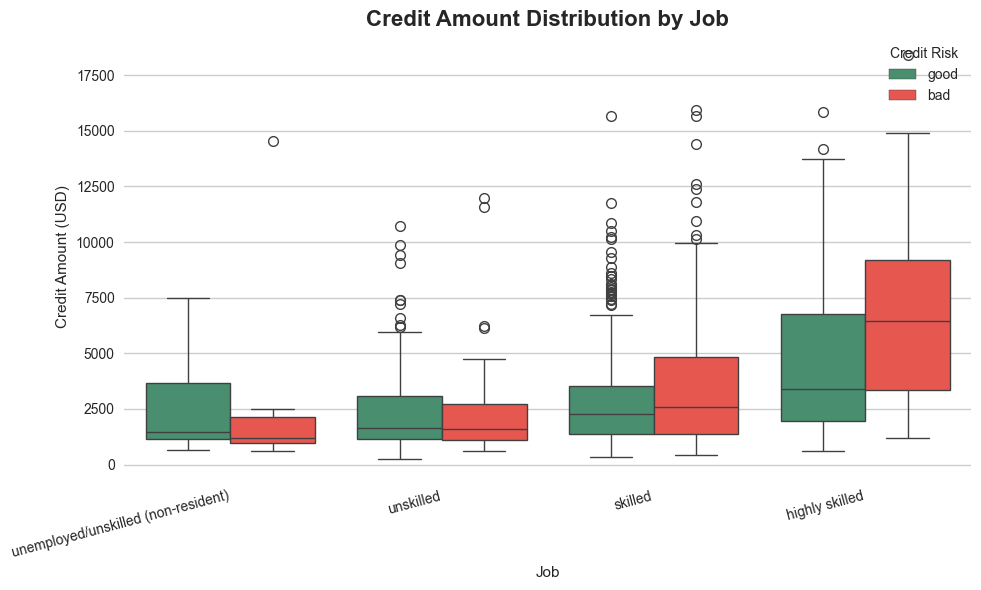

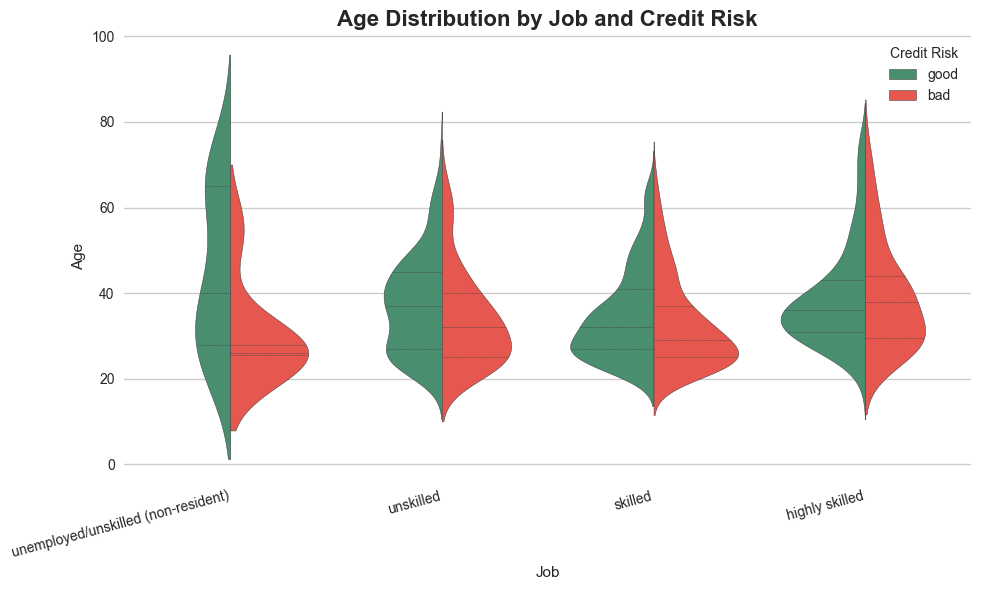

In [113]:
# Plot using Seaborn
plt.figure(figsize=(10,6))
sns.boxplot(
    data=german_data,
    x="Job",
    y="Credit amount",
    hue="Risk",
    palette={"good": "#3D9970", "bad": "#FF4136"}
)

plt.title("Credit Amount Distribution by Job", fontsize=16, weight="bold")
plt.xlabel("Job")
plt.ylabel("Credit Amount (USD)")
plt.xticks(rotation=15, ha="right")
plt.legend(title="Credit Risk", loc="upper right")

plt.tight_layout()
plt.show()

# Plot violin plot
plt.figure(figsize=(10,6))
sns.violinplot(
    data=german_data,
    x="Job",
    y="Age",
    hue="Risk",
    split=True,  # overlays good vs bad on same violin
    inner="quartiles", # shows median + IQR inside
    palette={"good": "#3D9970", "bad": "#FF4136"}
)

plt.title("Age Distribution by Job and Credit Risk", fontsize=16, weight="bold")
plt.xlabel("Job")
plt.ylabel("Age")
plt.xticks(rotation=15, ha="right")
plt.legend(title="Credit Risk", loc="upper right")

plt.tight_layout()
plt.show()


### Credit Amount and Age Distribution by Job

- As job skill level increases, credit amount tends to rise.
- Across all job categories, bad risks are generally associated with higher credit amounts.
- The risk gap widens significantly among skilled and highly skilled workers, making job type a potentially important variable for credit risk modeling.
- For all job categories except the unemployed, individuals with bad credit typically have a higher median credit amount and a wider range of credit amounts compared to those with good credit. This is most prominent in the skilled and highly skilled groups, where the median credit amount for bad credit is noticeably higher.
- There are numerous outliers, particularly in the skilled and highly skilled categories, where individuals have taken out very large credit amounts. These are found in both good and bad credit groups, but the bad credit outliers often extend to higher values.

- *Conclusion*: Across all job categories, individuals with bad credit are consistently younger on average than those with good credit. This supports the observation from the first analysis that younger individuals are at a higher risk for poor credit.



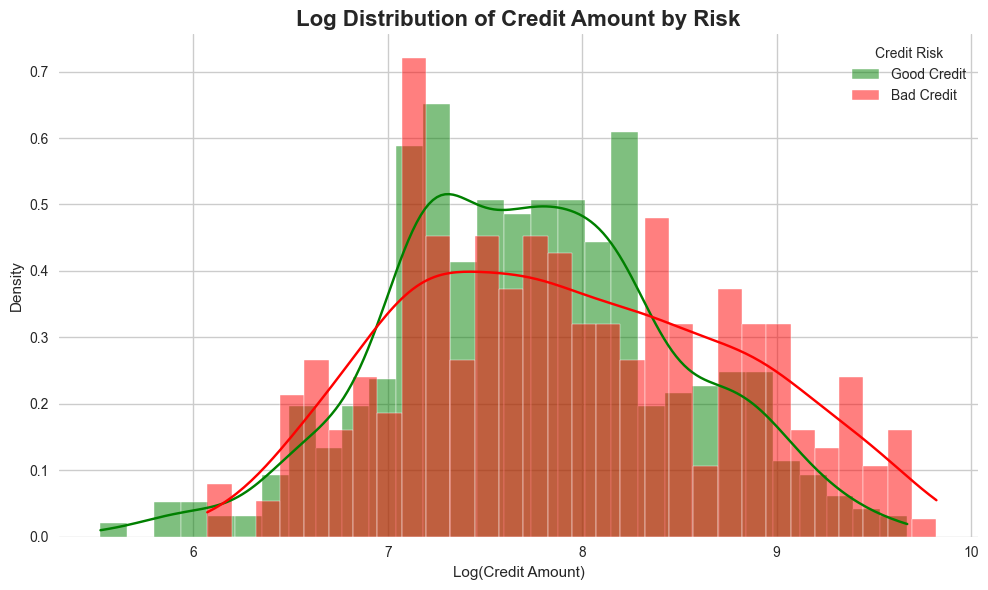

In [15]:
# Apply log transform
x1 = np.log(df_good['Credit amount'])
x2 = np.log(df_bad['Credit amount'])

plt.figure(figsize=(10,6))

# Histogram + KDE for good credit
sns.histplot(x1, bins=30, kde=True, stat="density",
             color="green", alpha=0.5, label="Good Credit")

# Histogram + KDE for bad credit
sns.histplot(x2, bins=30, kde=True, stat="density",
             color="red", alpha=0.5, label="Bad Credit")

plt.title("Log Distribution of Credit Amount by Risk", fontsize=16, weight="bold")
plt.xlabel("Log(Credit Amount)")
plt.ylabel("Density")
plt.legend(title="Credit Risk")

plt.tight_layout()
plt.show()

### Log Dist of Credit Amount by Risk
- The "Bad Credit" distribution has a slightly lower and broader peak, with a significant concentration of higher loan amounts.

- The green curve ("Good Credit") shows a higher density in the middle range of log credit amounts, indicating that a greater proportion of good credit loans fall within this range.

- The red curve ("Bad Credit") shows a higher density towards the higher end of the log credit amounts, suggesting that a larger proportion of bad credit loans are for higher amounts compared to the good credit group.


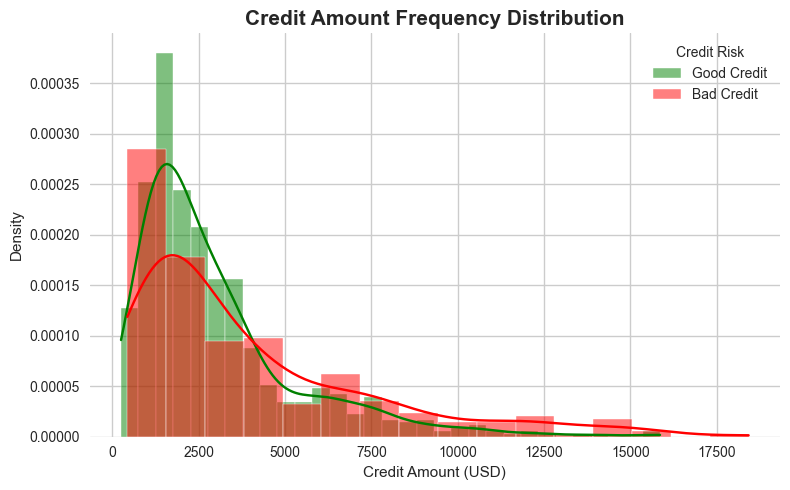

In [114]:
plt.figure(figsize=(8,5))

# Good credit histogram + KDE
sns.histplot(df_good['Credit amount'], color='g', kde=True, stat="density", label='Good Credit', alpha=0.5)

# Bad credit histogram + KDE
sns.histplot(df_bad['Credit amount'], color='r', kde=True, stat="density", label='Bad Credit', alpha=0.5)

plt.title("Credit Amount Frequency Distribution", fontsize=15, weight='bold')
plt.xlabel("Credit Amount (USD)")
plt.ylabel("Density")
plt.legend(title="Credit Risk")
plt.tight_layout()
plt.show()

### Insights 
- Both distributions are heavily right-skewed, meaning most loans are for smaller amounts, and there are fewer loans for larger amounts.

- The "Good Credit" group has a higher frequency of loans in the $0 to $5,000 range compared to the "Bad Credit" group.

- The "Bad Credit" group's distribution is flatter and more spread out, with a higher proportion of loans in the higher amount ranges (e.g., above $5,000) compared to the "Good Credit" group.

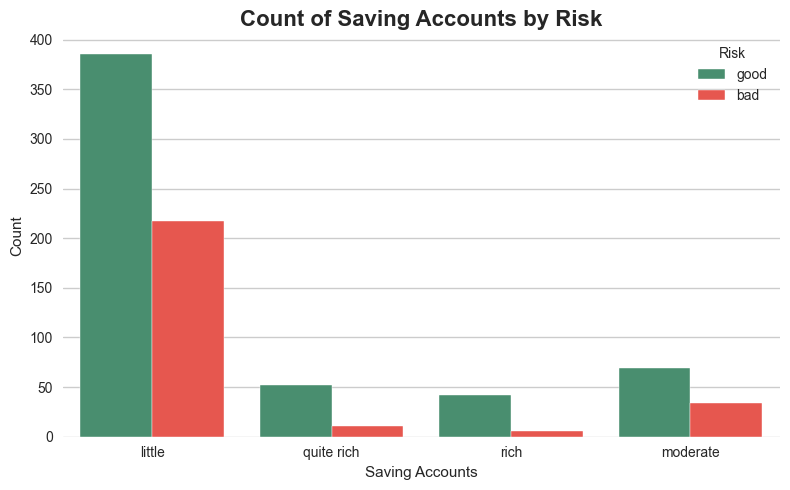

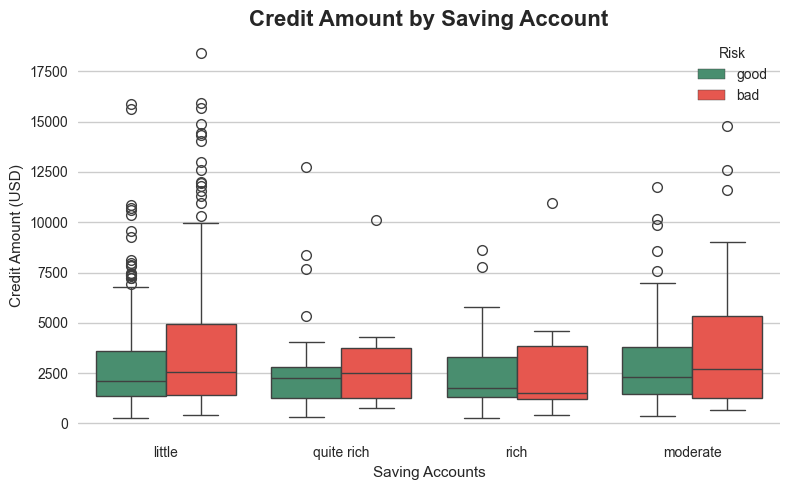

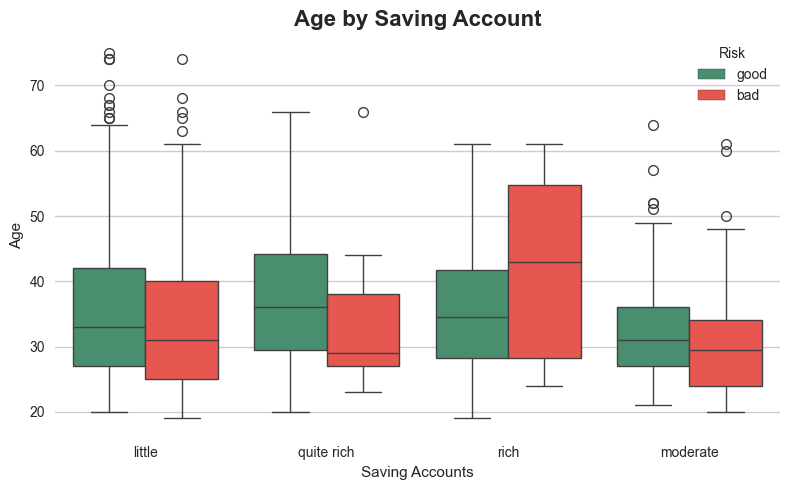

In [17]:
# Set theme and colors
sns.set_style("whitegrid")
palette = {"good": "#3D9970", "bad": "#FF4136"}  # green = good, red = bad

# --- 1. Count of Saving Accounts by Risk ---
plt.figure(figsize=(8,5))
sns.countplot(
    data=german_data,
    x="Saving accounts",
    hue="Risk",
    palette=palette
)
plt.title("Count of Saving Accounts by Risk", fontsize=16, weight='bold')
plt.xlabel("Saving Accounts")
plt.ylabel("Count")
plt.legend(title="Risk")
plt.tight_layout()
plt.show()

# --- 2. Credit Amount by Saving Account category ---
plt.figure(figsize=(8,5))
sns.boxplot(
    data=german_data,
    x="Saving accounts",
    y="Credit amount",
    hue="Risk",
    palette=palette
)
plt.title("Credit Amount by Saving Account", fontsize=16, weight='bold')
plt.xlabel("Saving Accounts")
plt.ylabel("Credit Amount (USD)")
plt.legend(title="Risk")
plt.tight_layout()
plt.show()

# --- 3. Age by Saving Account category ---
plt.figure(figsize=(8,5))
sns.boxplot(
    data=german_data,
    x="Saving accounts",
    y="Age",
    hue="Risk",
    palette=palette
)
plt.title("Age by Saving Account", fontsize=16, weight='bold')
plt.xlabel("Saving Accounts")
plt.ylabel("Age")
plt.legend(title="Risk")
plt.tight_layout()
plt.show()

### Saving Account by Age, Risk and Credit Amount
- In every saving account category, the median credit amount (the line inside the box) is consistently higher for "bad" credit risks than for "good" credit risks.

- The spread of credit amounts (the size of the box, representing the interquartile range) is also generally larger for "bad" credit risks in all categories.

- The "little" savings account group has the largest overall credit amounts for both good and bad risks, as indicated by the highest median, the largest box, and a significant number of outliers.

- The "quite rich" and "rich" saving account groups tend to have the lowest credit amounts overall.

Description of Distribuition Saving accounts by Risk:  
Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


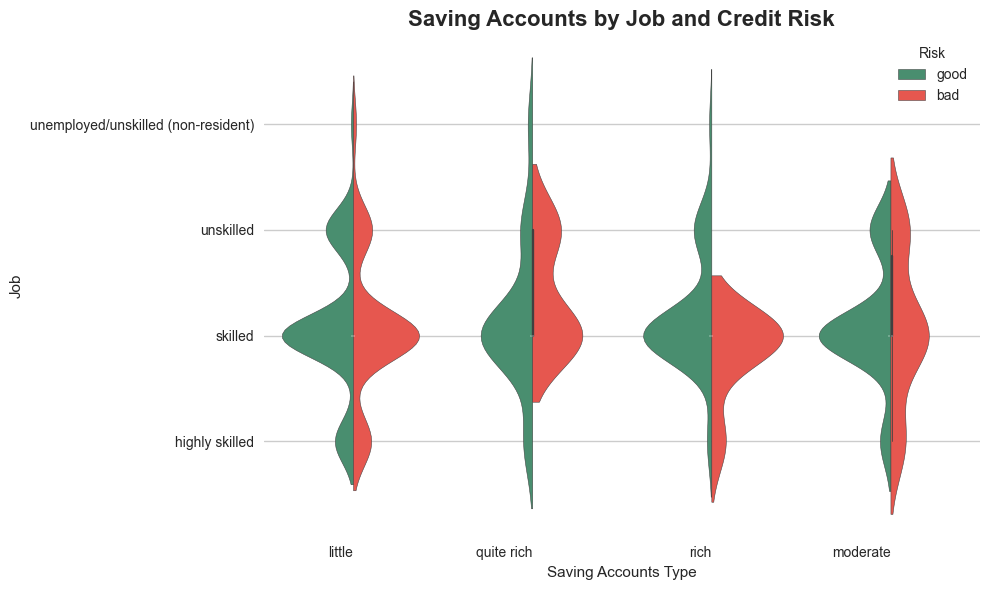

In [18]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(german_data["Saving accounts"],german_data.Risk))

# Professional colors
palette = {"good": "#3D9970", "bad": "#FF4136"}

plt.figure(figsize=(10,6))
sns.violinplot(
    data=german_data,
    x="Saving accounts",
    y="Job",
    hue="Risk",
    split=True,  # overlay Good vs Bad
    palette=palette
)

plt.title("Saving Accounts by Job and Credit Risk", fontsize=16, weight='bold')
plt.xlabel("Saving Accounts Type")
plt.ylabel("Job")
plt.legend(title="Risk")
plt.xticks(rotation=0, ha="right")  # improve readability if needed
plt.tight_layout()
plt.show()

### Saving Accounts by Job and Credit Risk

- Skilled and Highly Skilled jobs have a balanced distribution of good and bad credit risk.

- Unemployed and Unskilled (non-resident) jobs show a lower proportion of good credit risk, especially in the "little" savings category.

- Customers with "little" savings accounts are associated with the largest credit amounts for both good and bad credit.

- Customers with "rich" or "quite rich" savings accounts tend to have lower credit amounts overall.

Values describe:
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


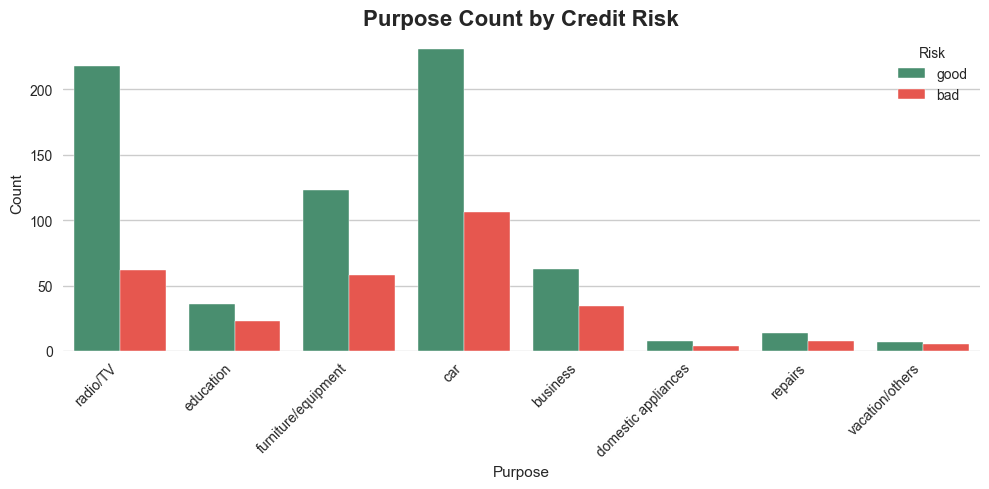

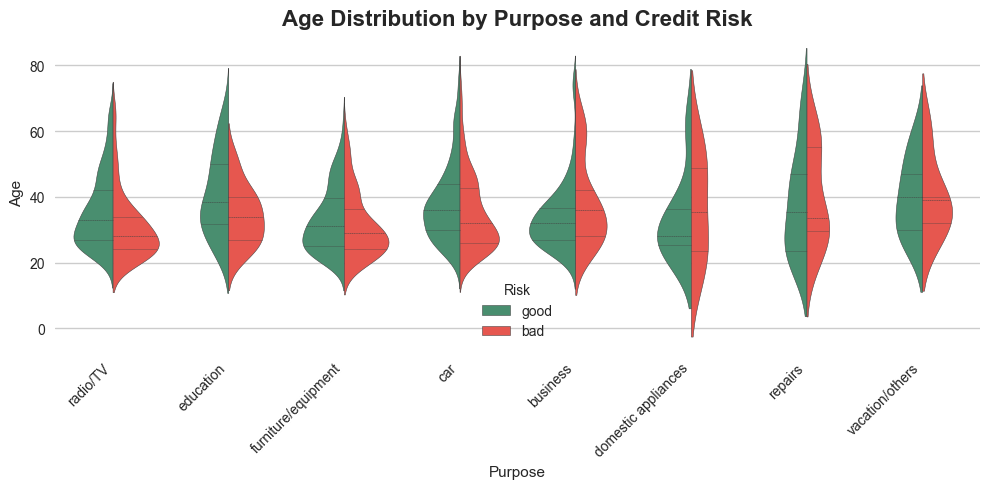

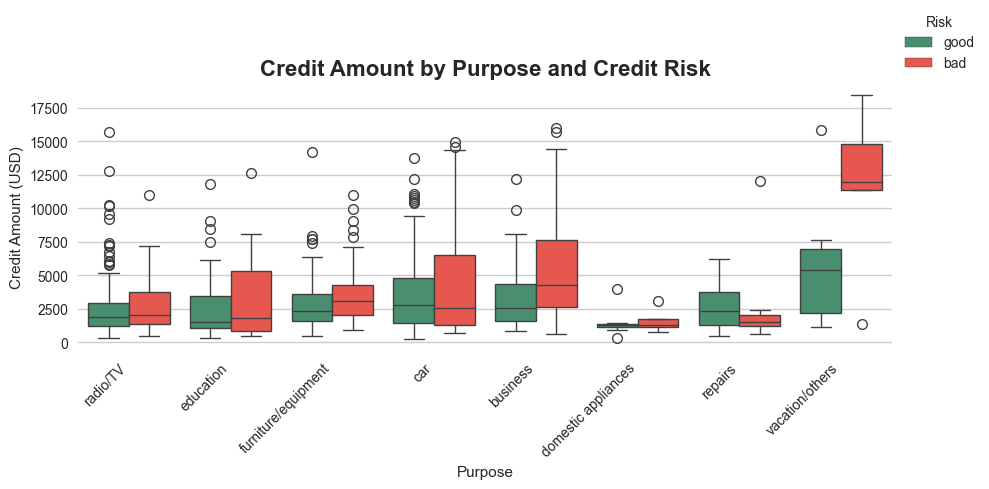

In [19]:
# Show counts table
print("Values describe:")
print(pd.crosstab(german_data.Purpose, german_data.Risk))

# Professional colors
palette = {"good": "#3D9970", "bad": "#FF4136"}

# --- 1. Count plot: Purpose by Risk ---
plt.figure(figsize=(10,5))
sns.countplot(
    data=german_data,
    x="Purpose",
    hue="Risk",
    palette=palette
)
plt.title("Purpose Count by Credit Risk", fontsize=16, weight='bold')
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Risk")
plt.tight_layout()
plt.show()

# --- 2. Violin plot: Age by Purpose ---
plt.figure(figsize=(10,5))
sns.violinplot(
    data=german_data,
    x="Purpose",
    y="Age",
    hue="Risk",
    split=True,
    palette=palette,
    inner="quartiles"
)
plt.title("Age Distribution by Purpose and Credit Risk", fontsize=16, weight='bold')
plt.xlabel("Purpose")
plt.ylabel("Age")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Risk")
plt.tight_layout()
plt.show()

# --- 3. Boxplot: Credit Amount by Purpose ---
plt.figure(figsize=(10,5))
sns.boxplot(
    data=german_data,
    x="Purpose",
    y="Credit amount",
    hue="Risk",
    palette=palette
)
plt.title("Credit Amount by Purpose and Credit Risk", fontsize=16, weight='bold')
plt.xlabel("Purpose")
plt.ylabel("Credit Amount (USD)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Risk",bbox_to_anchor=(1,1),loc='lower left')
plt.tight_layout()
plt.show()

### Insights from looking at the purpose of these loans

- Across all charts, "bad credit" borrowers consistently took out higher loan amounts. This is seen in the distributions being skewed toward larger values and in the box plots where the median credit amount for bad credit is always higher than for good credit. The largest loans are consistently taken out by borrowers with a high-risk profile.

- People with "little" savings accounts tend to have the largest loan amounts, and there is a high concentration of bad credit risk in this group.

- Loans for cars are the most common purpose, with a significant number of "bad credit" cases.
    - Loans for vacation/others have the highest average credit amount for bad credit.


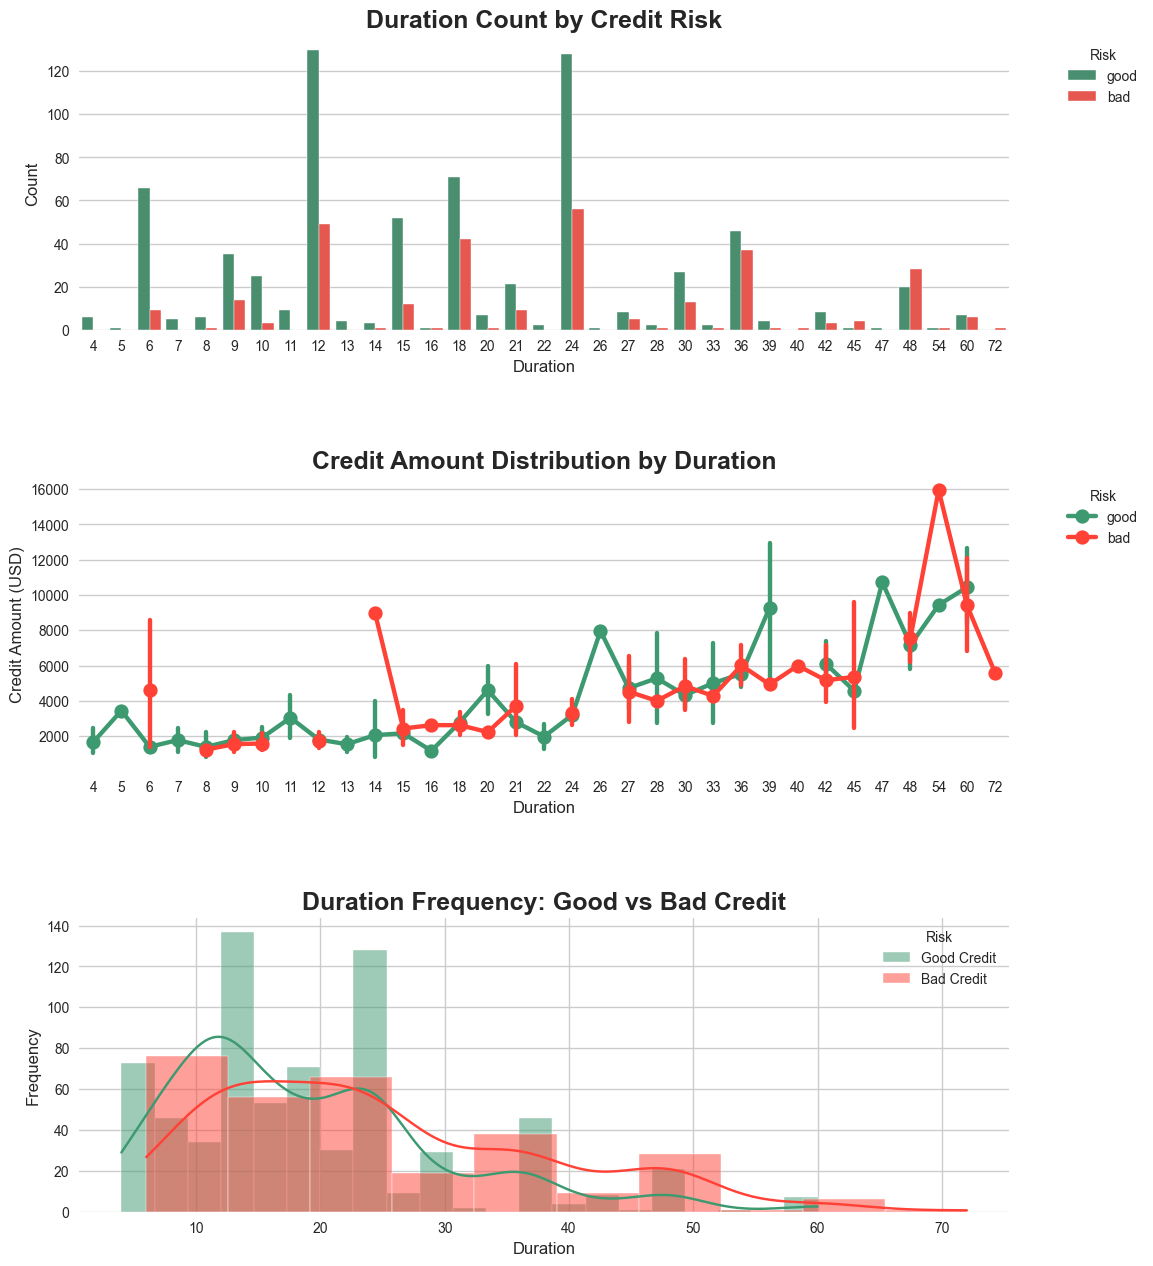

In [20]:
# Professional palette
palette = {"good": "#3D9970", "bad": "#FF4136"}

plt.figure(figsize=(12,14))

# --- 1. Countplot ---
ax1 = plt.subplot(311)
sns.countplot(
    data=german_data,
    x="Duration",
    hue="Risk",
    palette=palette,
    ax=ax1
)
ax1.set_xlabel("Duration", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_title("Duration Count by Credit Risk", fontsize=18, weight='bold')
ax1.legend(title="Risk", bbox_to_anchor=(1.05, 1), loc='upper left')  # legend outside

# --- 2. Pointplot (Credit Amount by Duration) ---
ax2 = plt.subplot(312)
sns.pointplot(
    data=german_data,
    x="Duration",
    y="Credit amount",
    hue="Risk",
    palette=palette,
    ax=ax2
)
ax2.set_xlabel("Duration", fontsize=12)
ax2.set_ylabel("Credit Amount (USD)", fontsize=12)
ax2.set_title("Credit Amount Distribution by Duration", fontsize=18, weight='bold')
ax2.legend(title="Risk", bbox_to_anchor=(1.05, 1), loc='upper left')  # legend outside

# --- 3. Histogram / Distribution of Duration ---
ax3 = plt.subplot(313)
sns.histplot(df_good["Duration"], color=palette["good"], kde=True, label="Good Credit", ax=ax3, stat="count")
sns.histplot(df_bad["Duration"], color=palette["bad"], kde=True, label="Bad Credit", ax=ax3, stat="count")
ax3.set_xlabel("Duration", fontsize=12)
ax3.set_ylabel("Frequency", fontsize=12)
ax3.set_title("Duration Frequency: Good vs Bad Credit", fontsize=18, weight='bold')
ax3.legend(title="Risk")

# Adjust spacing
plt.subplots_adjust(hspace=0.5, top=0.95)
plt.show()


### Insights from looking at the duration of these loans

- Good credit borrowers have a higher frequency of shorter-term loans (12-24 months). The Duration Count by Credit Risk chart shows a clear peak for good credit loans in the 12 to 24-month range.

- Bad credit borrowers are more common in longer-term loans. While good credit borrowers are also present, the proportion of bad credit borrowers is higher for loans lasting 30 months or longer.

Total values of Checking Account:
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


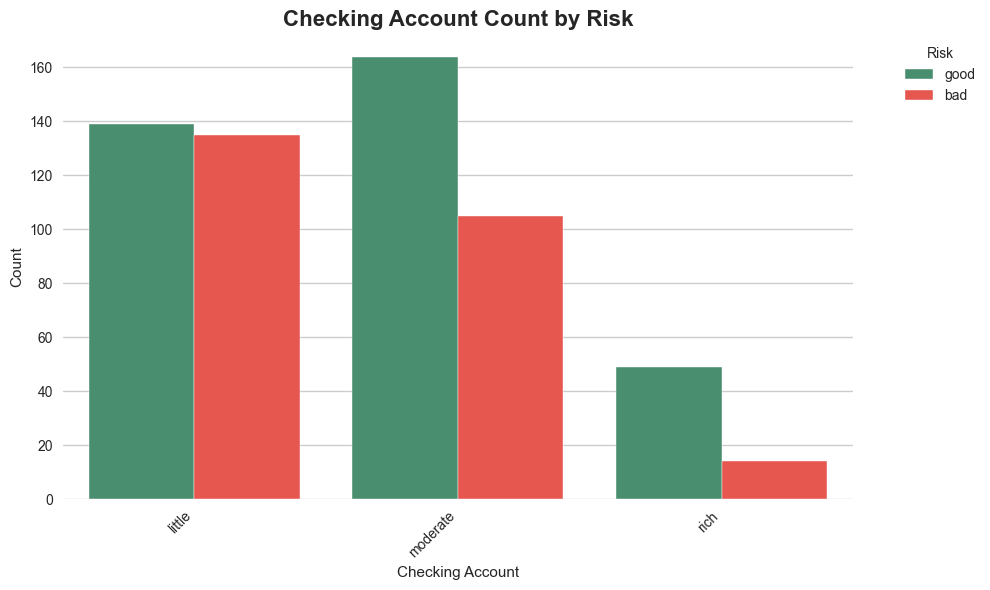

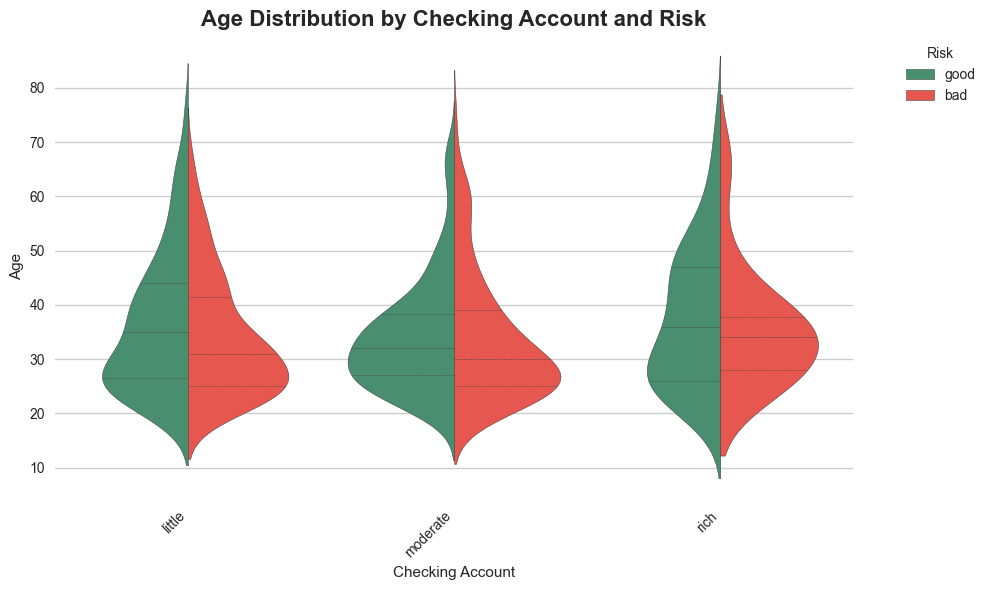

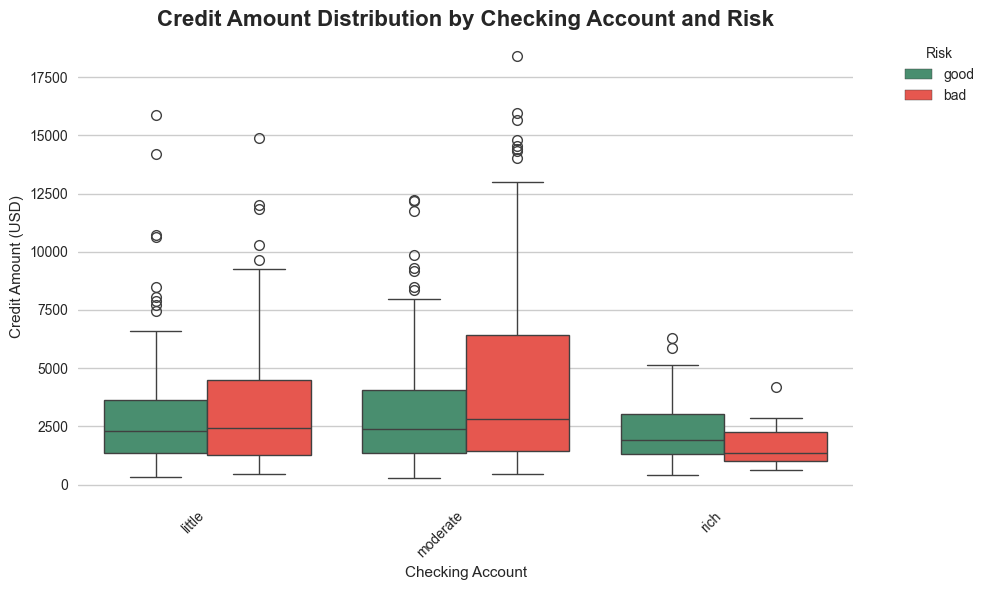

In [21]:
# Palette for Risk
palette = {"good": "#3D9970", "bad": "#FF4136"}

# Print counts
print("Total values of Checking Account:")
print(german_data.groupby("Checking account")["Checking account"].count())

# --- 1. Countplot ---
plt.figure(figsize=(10,6))
sns.countplot(
    data=german_data,
    x="Checking account",
    hue="Risk",
    palette=palette
)
plt.title("Checking Account Count by Risk", fontsize=16, weight='bold')
plt.xlabel("Checking Account")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Risk", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 2. Violin plot (Age by Checking Account) ---
plt.figure(figsize=(10,6))
sns.violinplot(
    data=german_data,
    x="Checking account",
    y="Age",
    hue="Risk",
    split=True,
    palette=palette,
    inner="quartiles"
)
plt.title("Age Distribution by Checking Account and Risk", fontsize=16, weight='bold')
plt.xlabel("Checking Account")
plt.ylabel("Age")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Risk", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 3. Boxplot (Credit Amount by Checking Account) ---
plt.figure(figsize=(10,6))
sns.boxplot(
    data=german_data,
    x="Checking account",
    y="Credit amount",
    hue="Risk",
    palette=palette
)
plt.title("Credit Amount Distribution by Checking Account and Risk", fontsize=16, weight='bold')
plt.xlabel("Checking Account")
plt.ylabel("Credit Amount (USD)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Risk", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insights from looking through Checking Accounts

- Customers with a "little" checking account tend to have higher loan amounts and a lower proportion of good credit.

- Similarly, borrowers with "little" savings accounts are associated with the largest credit amounts overall, and there's a higher concentration of bad credit risk within this group.

- Conversely, customers with "rich" or "quite rich" savings and checking accounts tend to take out smaller, more consistent loans.

In [23]:
print(pd.crosstab(german_data["Checking account"],german_data.Sex))

# Columns to cross
date_int = ["Purpose", 'Sex']

# Create a light green colormap
cm = sns.light_palette("green", as_cmap=True)

# Create crosstab and style with gradient
ct = pd.crosstab(german_data[date_int[0]], german_data[date_int[1]])
ct_styled = ct.style.background_gradient(cmap=cm)

ct_styled


Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [25]:


def one_hot_encoder(german_data, nan_as_category=False, drop_first=True):
    """
    One-hot encode categorical features in a DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame.
    nan_as_category : bool, optional (default=False)
        Whether to create a separate category for NaN values.
    drop_first : bool, optional (default=True)
        Whether to drop the first level to avoid multicollinearity.

    Returns
    -------
    df_encoded : pd.DataFrame
        DataFrame with categorical variables one-hot encoded.
    new_columns : list
        List of new one-hot encoded column names.
    """
    original_columns = set(german_data.columns)
    categorical_columns = [col for col in german_data.columns if german_data[col].dtype == 'object']
    
    df_encoded = pd.get_dummies(
        german_data,
        columns=categorical_columns,
        dummy_na=nan_as_category,
        drop_first=drop_first
    )
    
    new_columns = [c for c in df_encoded.columns if c not in original_columns]
    
    return df_encoded, new_columns



In [26]:

# Fill missing values first
german_data['Saving accounts'] = german_data['Saving accounts'].fillna('no_inf')
german_data['Checking account'] = german_data['Checking account'].fillna('no_inf')

# List of categorical columns to encode (drop_first = True except for Risk to keep both labels)
categorical_cols = [
    ("Purpose", True, "Purpose"),
    ("Sex", True, "Sex"),
    ("Housing", True, "Housing"),
    ("Saving accounts", True, "Savings"),
    ("Risk", False, "Risk"),  # Keep both 0/1 for classification target
    ("Checking account", True, "Check"),
    ("Age_cat", True, "Age_cat")
]

# Apply get_dummies and merge
for col, drop_first, prefix in categorical_cols:
    dummies = pd.get_dummies(german_data[col], drop_first=drop_first, prefix=prefix)
    german_data = german_data.join(dummies)


In [27]:
# List of columns to drop (original categorical + one redundant dummy)
drop_cols = [
    "Saving accounts",
    "Checking account",
    "Purpose",
    "Sex",
    "Housing",
    "Age_cat",
    "Risk",
    "Risk_good"   # redundant dummy
]

german_data = german_data.drop(columns=drop_cols, errors="ignore")


In [38]:
# Create one-hot encoded columns for 'Job'
job_dummies = pd.get_dummies(german_data['Job'], prefix='Job', drop_first=True)

# Drop the original 'Job' column and add the new one-hot encoded columns
german_data = pd.concat([german_data.drop('Job', axis=1), job_dummies], axis=1)

# Now, `german_data` is ready for model training, as all categorical columns are numerical.

# 5. Correlation
We are looking at the relationship between the variables using the correlation heat map

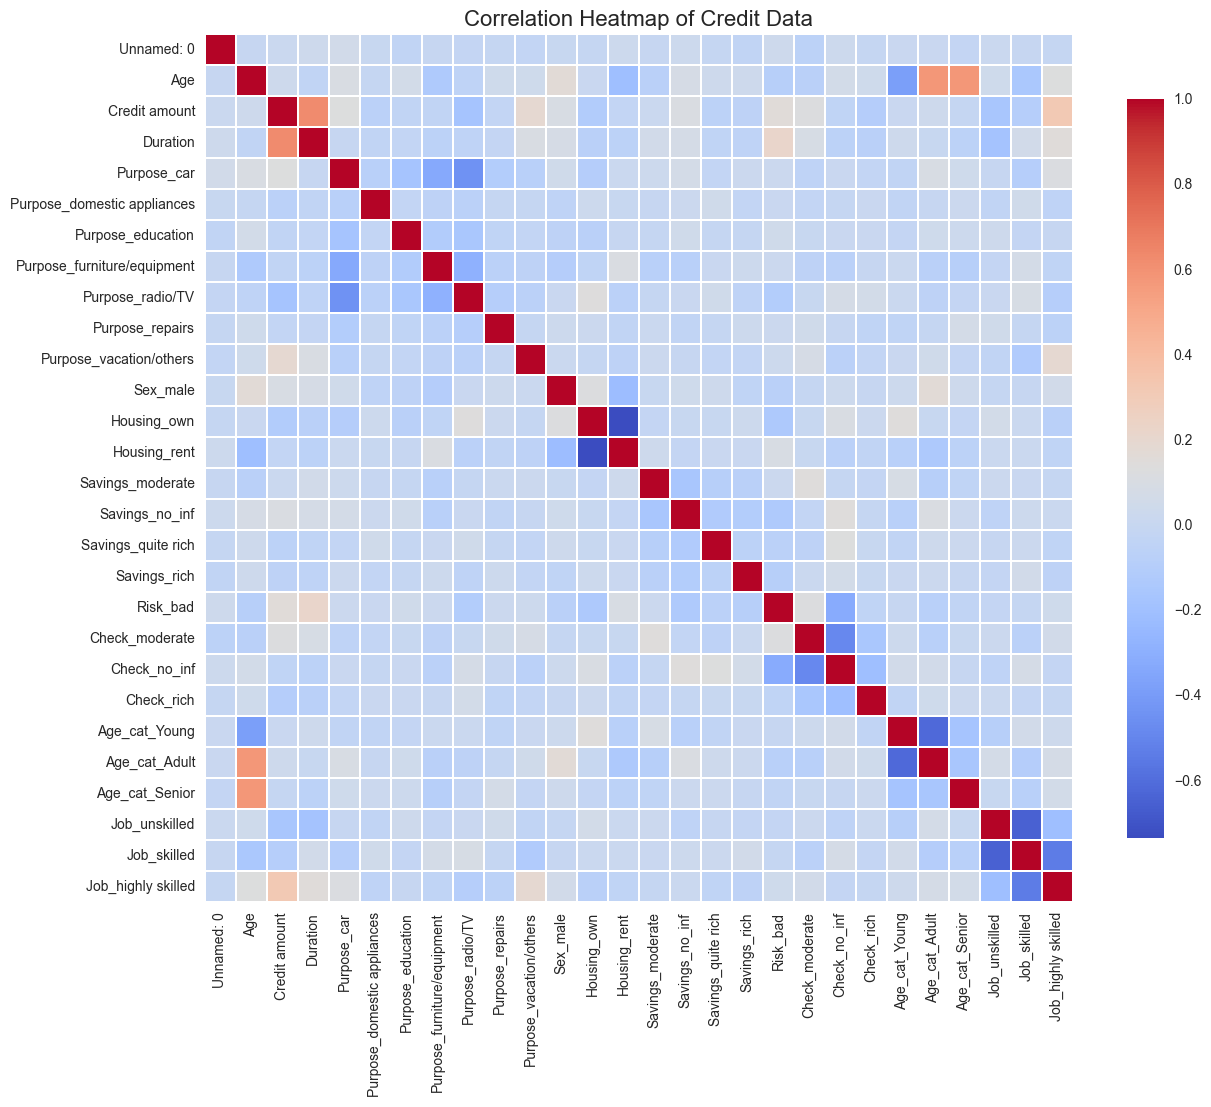

In [39]:

plt.figure(figsize=(14, 12))

# correlation matrix
corr = german_data.corr(numeric_only=True)

# heatmap
sns.heatmap(
    corr,
    cmap="coolwarm",     
    linewidths=0.1,
    vmax=1.0,
    square=True,
    linecolor="white",
    cbar_kws={"shrink": .8}  # shrink colorbar
)

plt.title("Correlation Heatmap of Credit Data", fontsize=16)
plt.show()


In [40]:
german_data.head()

,Unnamed: 0,Age,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent,Savings_moderate,Savings_no_inf,Savings_quite rich,Savings_rich,Risk_bad,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior,Job_unskilled,Job_skilled,Job_highly skilled
0,0,67,1169,6,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
1,1,22,5951,48,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
2,2,49,2096,12,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False
3,3,45,7882,42,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,4,53,4870,24,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False


# 6. Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [41]:
# Assuming your target variable is "Risk_bad"
X = german_data.drop(columns=["Risk_bad"])  
y = german_data["Risk_bad"]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [43]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [44]:
results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")
    results[name] = cv_results.mean()
    print(f"{name}: {cv_results.mean():.4f} ± {cv_results.std():.4f}")


Logistic Regression: 0.7225 ± 0.0289
Decision Tree: 0.6800 ± 0.0352
Random Forest: 0.7300 ± 0.0232
KNN: 0.6625 ± 0.0373
LDA: 0.7288 ± 0.0196
Naive Bayes: 0.6825 ± 0.0207
SVM: 0.7087 ± 0.0339
XGBoost: 0.7250 ± 0.0454


In [45]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nBest Model:", best_model_name)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Best Model: Random Forest
Accuracy: 0.77

Confusion Matrix:
 [[128  12]
 [ 34  26]]

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.91      0.85       140
        True       0.68      0.43      0.53        60

    accuracy                           0.77       200
   macro avg       0.74      0.67      0.69       200
weighted avg       0.76      0.77      0.75       200



In [46]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.735


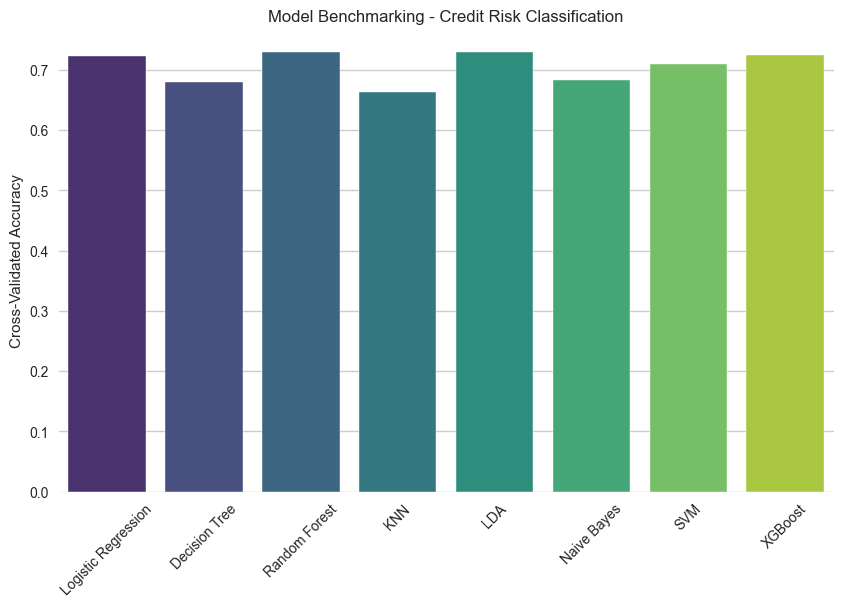

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Cross-Validated Accuracy")
plt.title("Model Benchmarking - Credit Risk Classification")
plt.show()

In [48]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.229 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.167 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.125 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.062 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.104 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.188 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.062 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.021 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.062 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.062 total time=   0.0s
[CV 1/5] END max_depth=3, max_feature

,estimator,RandomForestC...andom_state=2)
,param_grid,"{'max_depth': [3, 5, ...], 'max_features': [4, 7, ...], 'n_estimators': [3, 5, ...]}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,5
,verbose,4
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,25


In [49]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.45
{'max_depth': None, 'max_features': 15, 'n_estimators': 25}


In [61]:
rf = RandomForestClassifier(max_depth=None, max_features=15, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

,n_estimators,15
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,15
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [90]:
# Testing the model 
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Additional useful information
print(f"\nBest Parameters:")
print(grid_search.best_params_)
print(f"\nBest CV Score: {grid_search.best_score_:.4f}")

Accuracy: 0.7550

Confusion Matrix:
[[120  20]
 [ 29  31]]

Detailed Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.86      0.83       140
        True       0.61      0.52      0.56        60

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.69       200
weighted avg       0.75      0.76      0.75       200


Best Parameters:
{'colsample_bytree': 0.85, 'gamma': 0.4, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.85}

Best CV Score: 0.4917


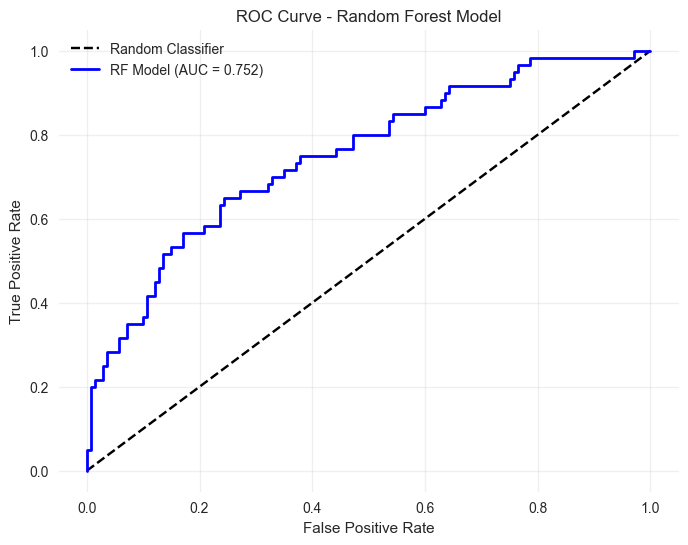

AUC Score: 0.7523


In [91]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predicting probabilities - use the best model from GridSearchCV
y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)[:,1]
# Or alternatively: y_pred_prob = grid_search.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve with improvements
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.plot(fpr, tpr, 'b-', linewidth=2, label=f'RF Model (AUC = {auc_score:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC Score: {auc_score:.4f}")

## Model 2:

In [88]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve
# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model to your training data
model_lda = lda.fit(X_train, y_train)

# Printing the Training Score
print("Training score data: ")
print(model_lda.score(X_train, y_train))

Training score data: 
0.76


0.725


[[122  18]
 [ 37  23]]


              precision    recall  f1-score   support

       False       0.77      0.87      0.82       140
        True       0.56      0.38      0.46        60

    accuracy                           0.72       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.71      0.72      0.71       200



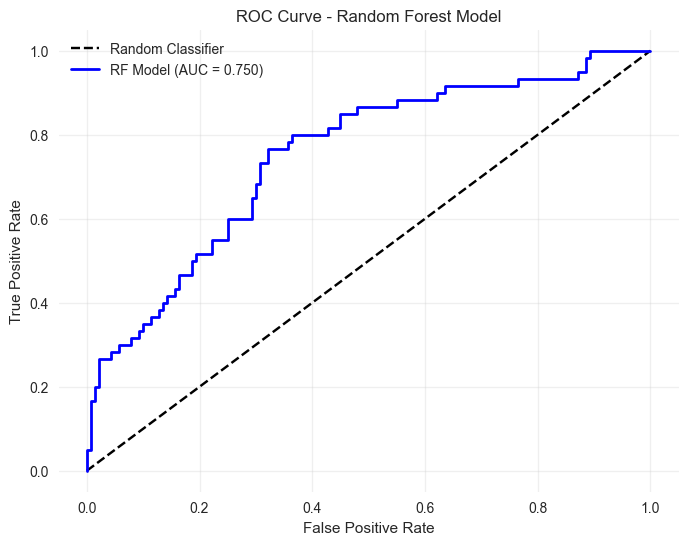

AUC Score: 0.7504


In [92]:
y_pred = model_lda.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve, roc_auc_score
# Predicting probabilities - use the best model from GridSearchCV
y_pred_prob = model_lda.predict_proba(X_test)[:,1]
# Or alternatively: y_pred_prob = grid_search.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve with improvements
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.plot(fpr, tpr, 'b-', linewidth=2, label=f'RF Model (AUC = {auc_score:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC Score: {auc_score:.4f}")

In [97]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression


# Feature engineering pipeline
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# Create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
#estimators.append(('lda', LinearDiscriminantAnalysis()))  # Fixed naming
estimators.append(('random_forest', RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=2
)))
model = Pipeline(estimators)

# Evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)  # Added shuffle
results = cross_val_score(model, X_train, y_train, cv=kfold)

print(f"Cross-validation scores: {results}")
print(f"Mean accuracy: {results.mean():.4f}")
print(f"Standard deviation: {results.std():.4f}")

Cross-validation scores: [0.6875 0.775  0.8125 0.825  0.7    0.675  0.725  0.6375 0.6875 0.75  ]
Mean accuracy: 0.7275
Standard deviation: 0.0586


In [100]:
from sklearn.metrics import fbeta_score

# Then your existing code will work:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.765


[[122  18]
 [ 29  31]]


0.5363321799307958


In [101]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

model_xg = XGBClassifier(random_state=2)
param_test1 = {
    'max_depth': [3, 6, 10],
    'min_child_weight': [3, 10],
    'gamma': [0.0, 0.2, 0.4],
    'subsample': [0.8, 0.85],
    'colsample_bytree': [0.8, 0.85]
}

grid_search = GridSearchCV(
    model_xg, 
    param_grid=param_test1, 
    cv=5, 
    scoring='recall',
    verbose=2,  # Add this for progress updates
    n_jobs=-1   # Use all available cores
)

# Smaller grid for faster exploration


grid_search.fit(X_train, y_train)

print("Best parameters:")
print(grid_search.best_params_)
print(f"\nBest CV score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters:
{'colsample_bytree': 0.85, 'gamma': 0.4, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.85}

Best CV score: 0.4917


In [102]:
y_pred = grid_search.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))


0.755


[[120  20]
 [ 29  31]]


# 6. Summary
Key outcomes and next steps.